In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
weather_data=pd.read_csv("E:\DataScience\Kaggle\Machine Learning\Weather_data.csv")

# Function for Weather_Data analysis

In [28]:
def weatherAnalysis(dataset):
    weather_data=dataset
    weather_data.columns = weather_data.columns.str.strip().str.lower().str.replace('_', '') 
    print("Shape of the Weather Data ", weather_data.shape)
    print("///////Percentage of missing data before Missing Data Analysis //////////")
    print(100*(weather_data.isna().sum())/len(weather_data))
    for column in weather_data.columns:
        if ((100*(weather_data[column].isna().sum())/len(weather_data[column]))>70):
            weather_data=weather_data.drop([column], axis=1)
        else:
            # Lets Split the Categorical Features and Continuous Features
            cont_feature=[x for x in weather_data.select_dtypes(exclude=['object']).columns]
            catg_feature=[x for x in weather_data.select_dtypes(include=['object']).columns]
            # Filling the continuous fetures with median values
            for col in cont_feature:
                weather_data[col]=weather_data[col].fillna(weather_data[col].median())
            for col in catg_feature:
                weather_data[col]=weather_data[col].fillna(method ='ffill')
    print("////////Percentage of missing data is after Missing Value Treatment////////// ")
    print(100*(weather_data.isna().sum())/len(weather_data))
    
    def formatdate(dataset):
        dataset[['date','hour']] = dataset.datetimeutc.str.split("-",expand=True) 
        dataset[['hour','min']] = dataset.hour.str.split(":",expand=True) 
        years=[]
        months=[]
        days=[]
        def sepDate(date):
            date=str(date)
            years.append(date[:4])
            months.append(date[4:6])
            days.append(date[6:])
        dates=dataset.date.values
        for date in dates:
            sepDate(date)
        dataset['year']=years
        dataset['day']=days
        dataset['month']=months
        dataset=dataset.drop(['datetimeutc','date'], axis=1)
        return dataset
    
    weather_data=formatdate(weather_data)
    
    for obs in range(1,6):
        weather_data["Temp_" + str(obs)] = weather_data.tempm.shift(obs)
        weather_data["Temp_" + str(obs)].fillna(0.00,inplace=True)
    
    catg_feature=[x for x in weather_data.select_dtypes(include=['object']).columns]
    from sklearn.preprocessing import LabelEncoder
    lableEnc=LabelEncoder()
    for column in catg_feature:
        weather_data[column]=lableEnc.fit_transform(weather_data[column])
    # Outlier Analysis
    # Lets Split the Categorical Features and Continuous Features
    cont_feature=[x for x in weather_data.select_dtypes(exclude=['object']).columns]
    catg_feature=[x for x in weather_data.select_dtypes(include=['object']).columns]  
    # Outlier Analysis
    print("Box plot before outlier Analysis : ")
    import seaborn as sns
    for column in weather_data.columns:
        sns.boxplot(x=weather_data[column])
        plt.show()
    i=0
    while(i==2):
        Q1=data.quantile(0.25)
        Q3=data.quantile(0.75)
        IQR = Q3 - Q1
        print(IQR)
        weather_data = weather_data[~((weather_data < (Q1 - 1.5 * IQR)) |(weather_data > (Q3 + 1.5 * IQR))).any(axis=1)]
        i=i+1
        
    # Min_Max Scaling
    from sklearn.preprocessing import MinMaxScaler
    def minmaxSac(dataset):
        sc = MinMaxScaler()
        dataset = sc.fit_transform(dataset)
        return dataset
    target=weather_data['tempm']
    features=weather_data.drop(['tempm'], axis=1)
    final_features=minmaxSac(features)
    
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size=0.2, random_state=1)
    
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    
    
    # Decision Tree Classifies
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms = sqrt(mean_squared_error(y_pred, y_test))
    print("Value of RMSE with Decision Tree : ",rms)
    
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestRegressor
    RFmodel = RandomForestRegressor(random_state=1)
    RFmodel.fit(X_train, y_train)
    y_pred_rf = RFmodel.predict(X_test)
    rms_RF = sqrt(mean_squared_error(y_pred_rf, y_test))
    print("Value of RMSE with Randon Forest Classifier : ",rms_RF)

Shape of the Weather Data  (98913, 20)
///////Percentage of missing data before Missing Data Analysis //////////
datetimeutc      0.0
conds            0.0
dewptm           0.0
fog              0.0
hail             0.0
heatindexm       0.0
hum              0.0
precipm        100.0
pressurem        0.0
rain             0.0
snow             0.0
tempm            0.0
thunder          0.0
tornado          0.0
vism             0.0
wdird            0.0
wdire            0.0
wgustm           0.0
windchillm       0.0
wspdm            0.0
dtype: float64
////////Percentage of missing data is after Missing Value Treatment////////// 
datetimeutc    0.0
conds          0.0
dewptm         0.0
fog            0.0
hail           0.0
heatindexm     0.0
hum            0.0
pressurem      0.0
rain           0.0
snow           0.0
tempm          0.0
thunder        0.0
tornado        0.0
vism           0.0
wdird          0.0
wdire          0.0
wgustm         0.0
windchillm     0.0
wspdm          0.0
dtype: float

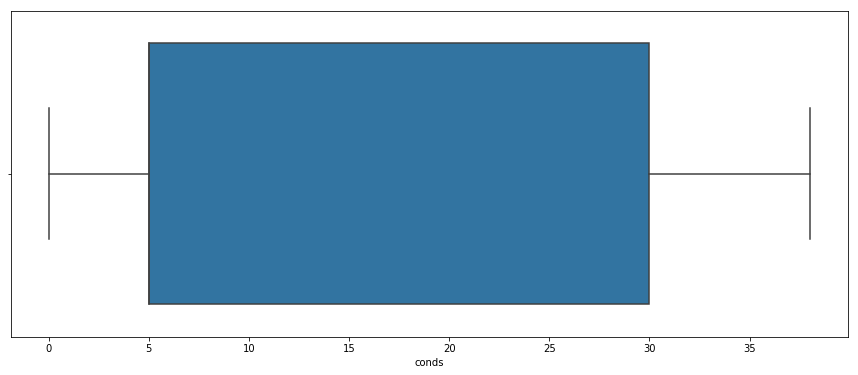

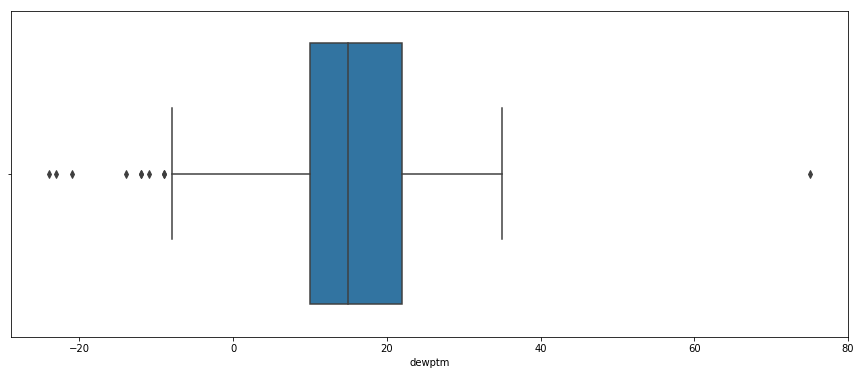

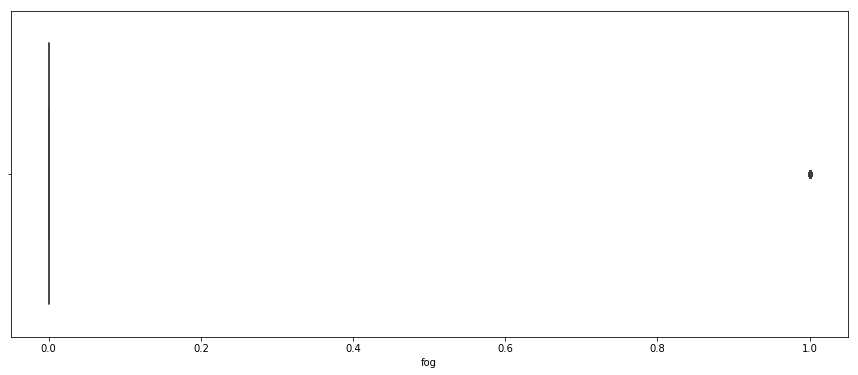

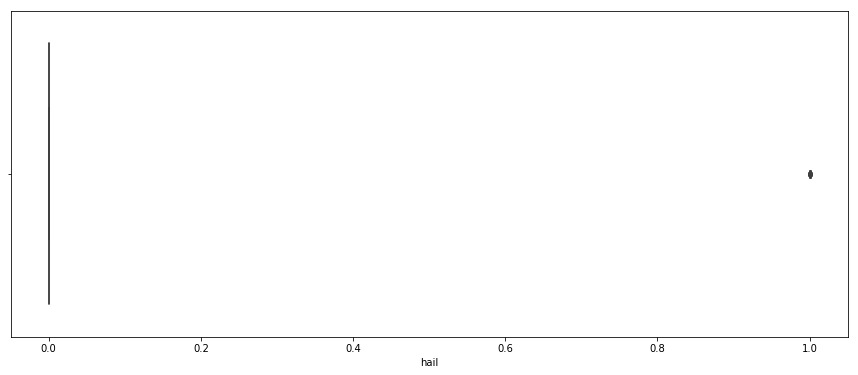

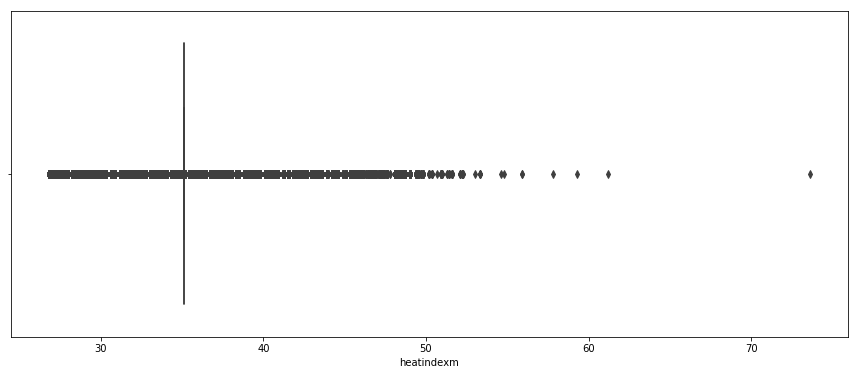

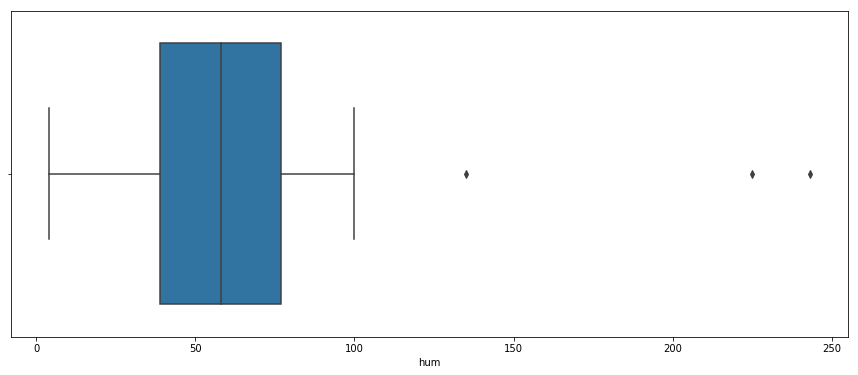

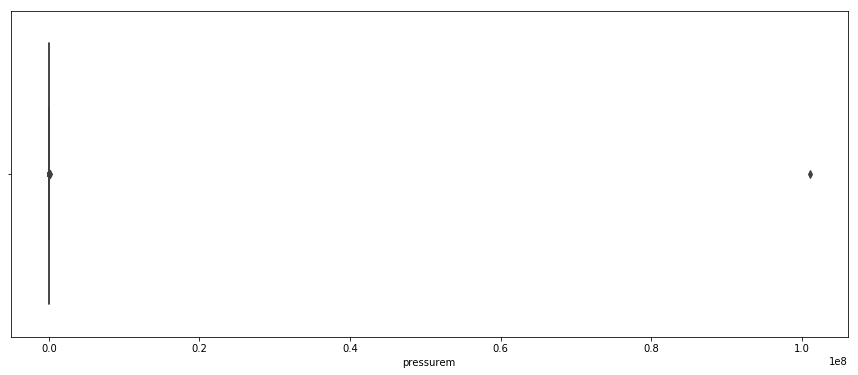

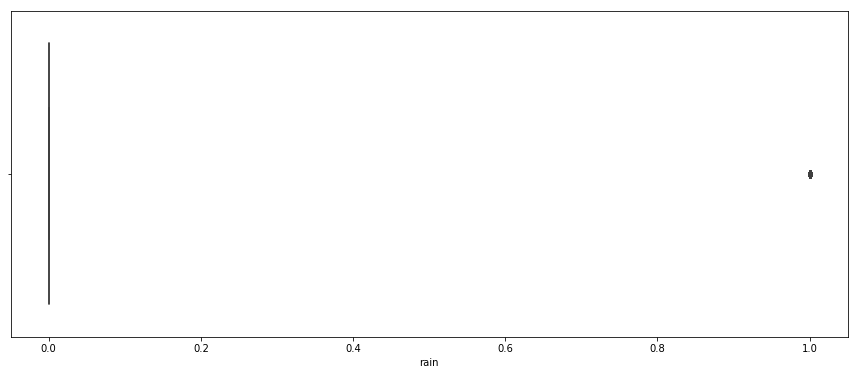

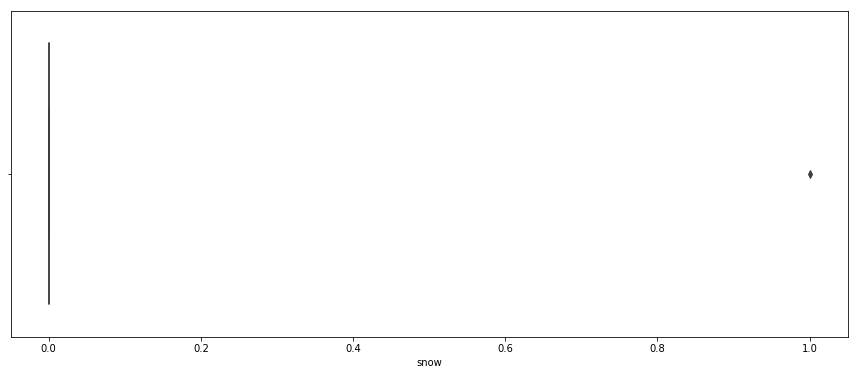

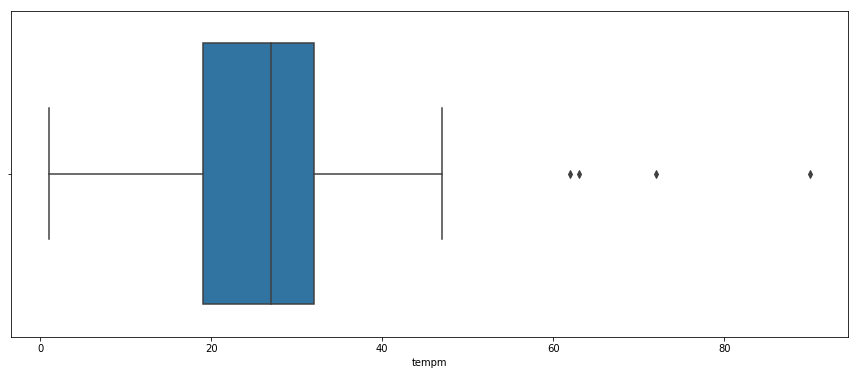

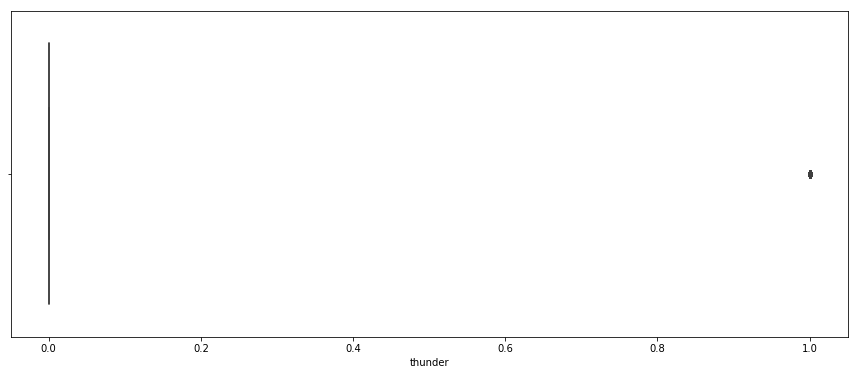

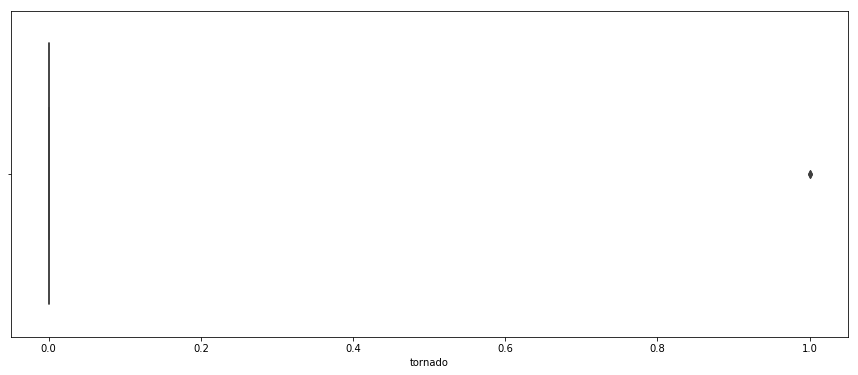

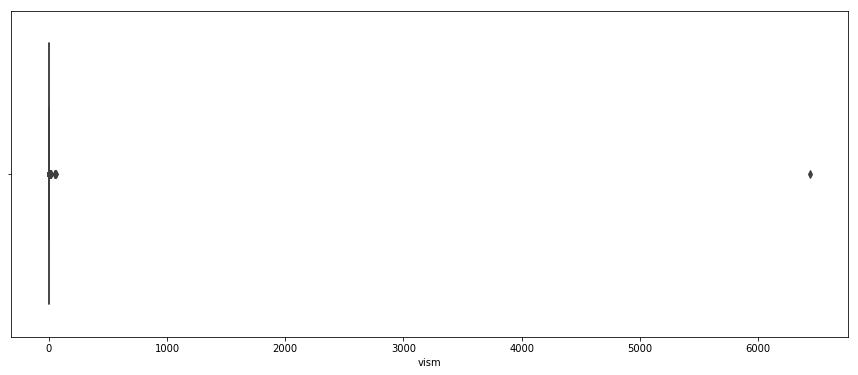

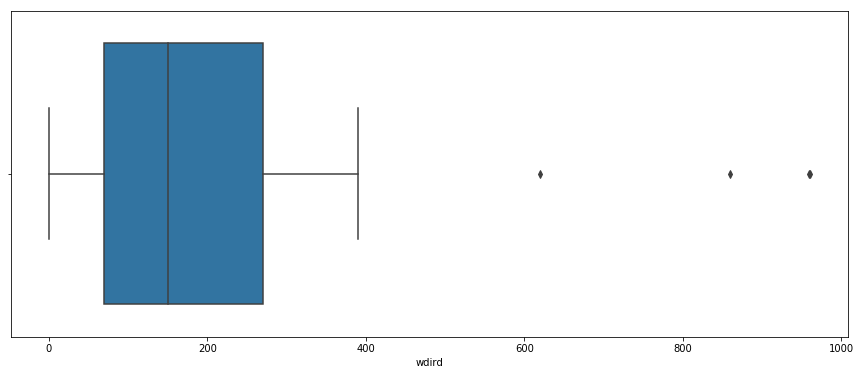

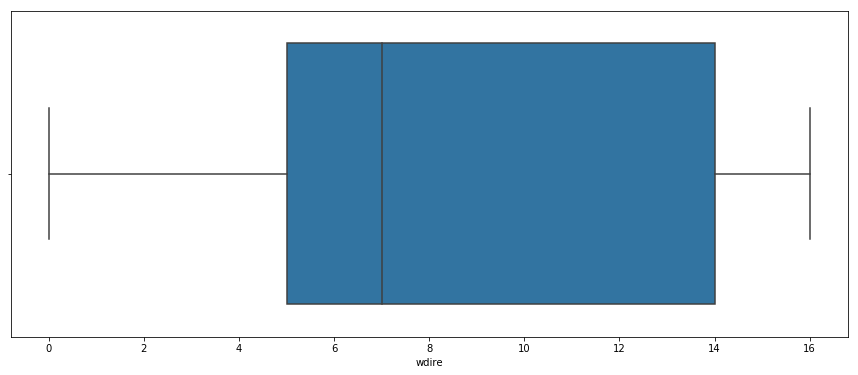

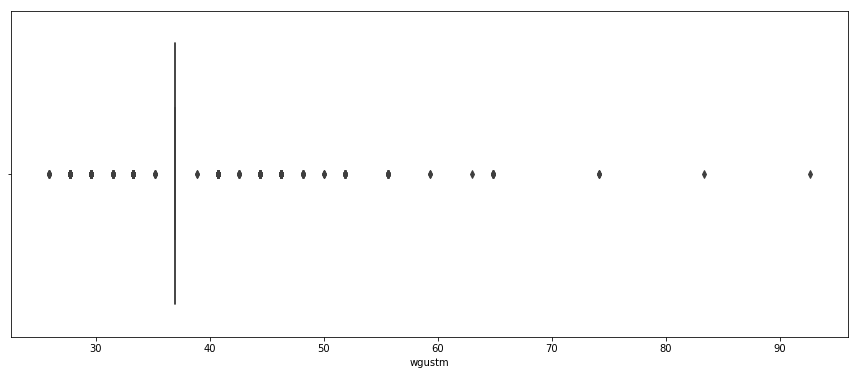

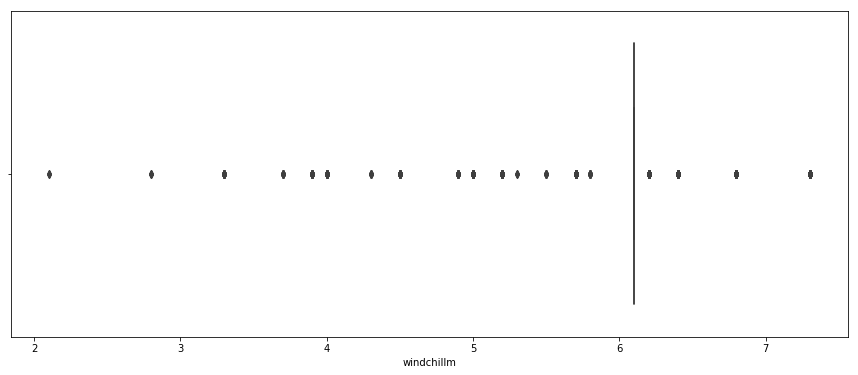

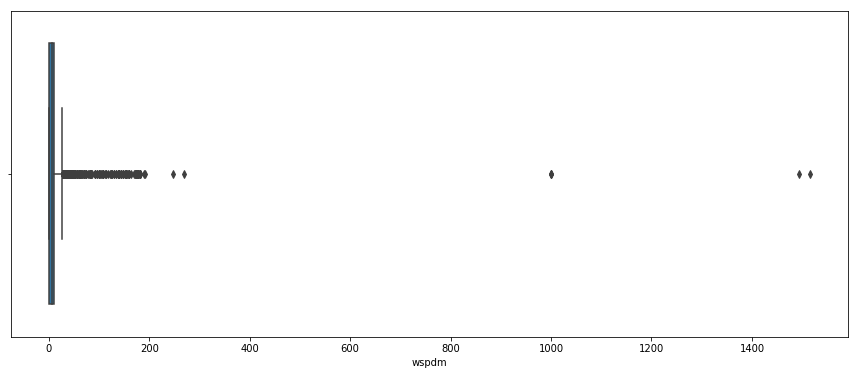

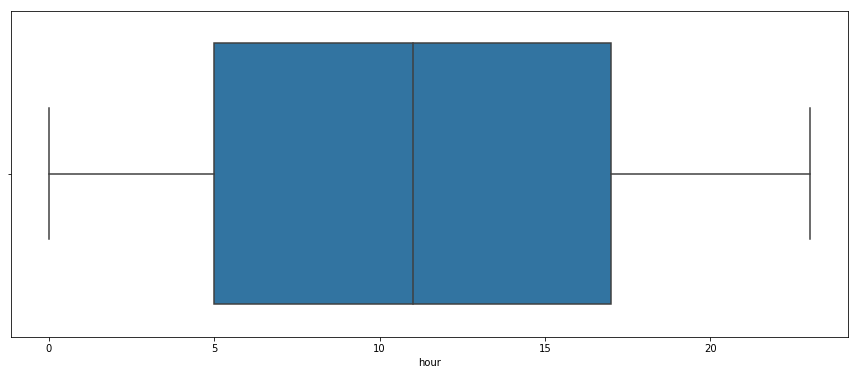

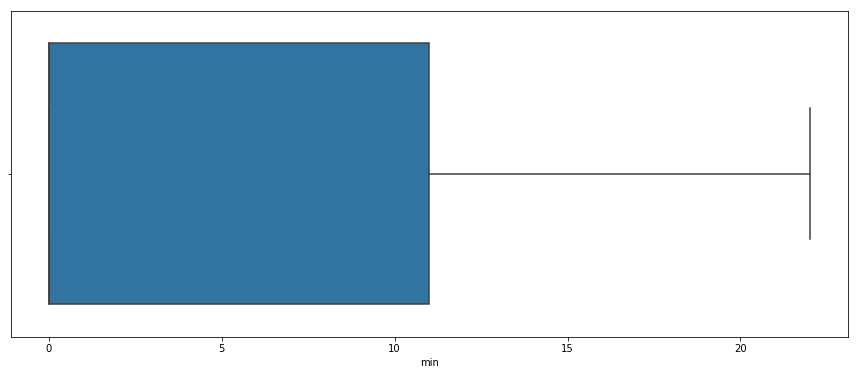

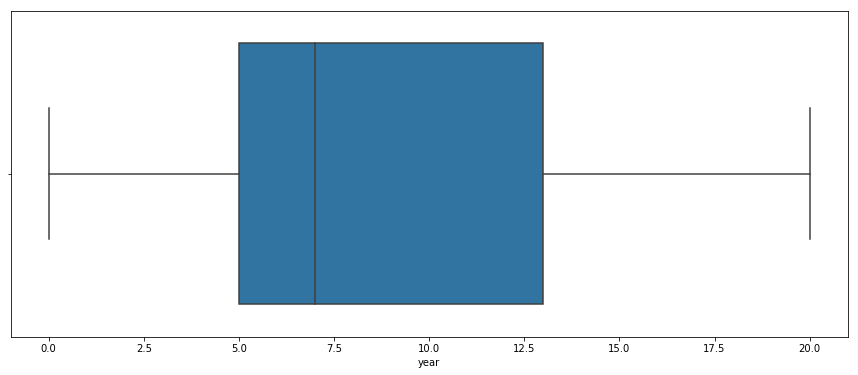

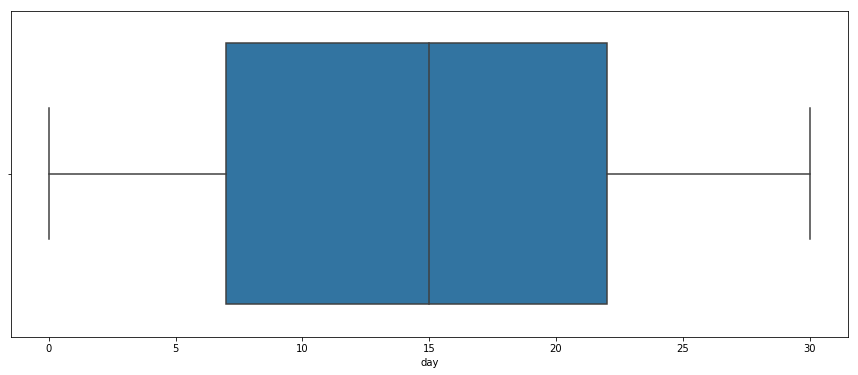

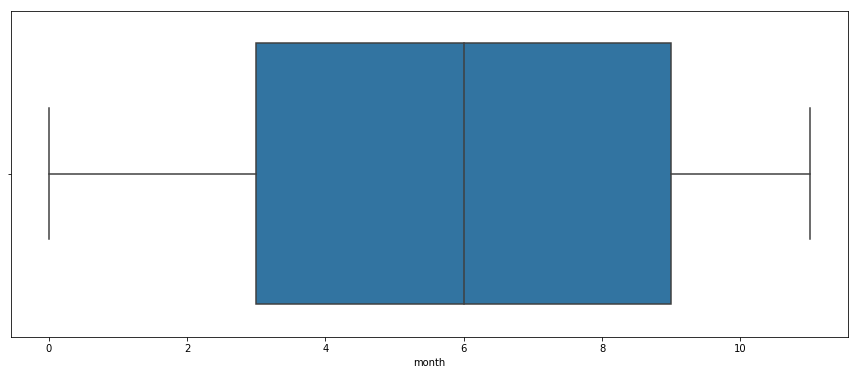

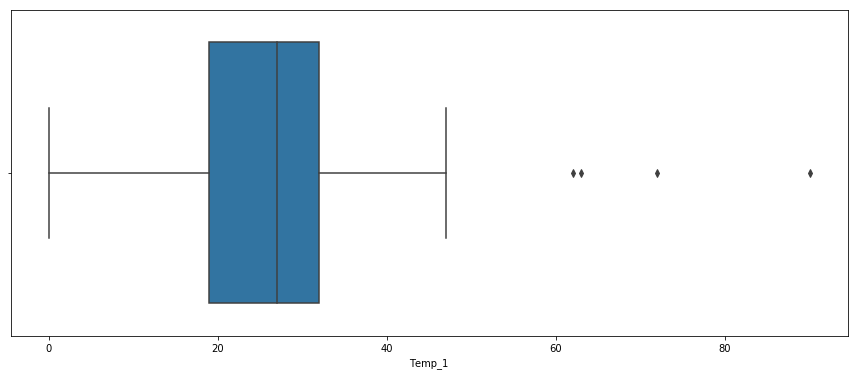

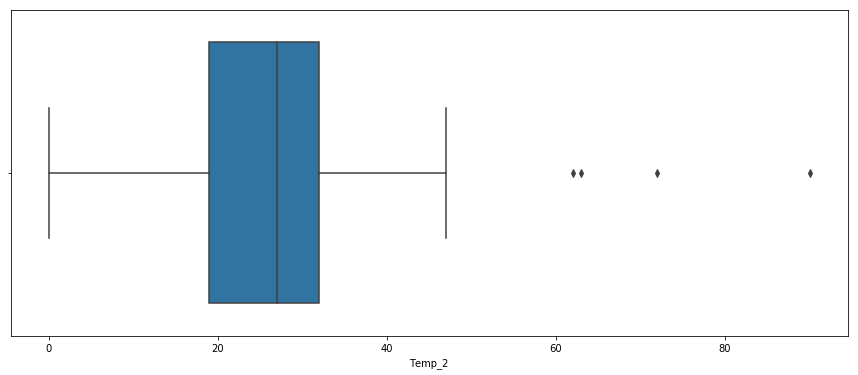

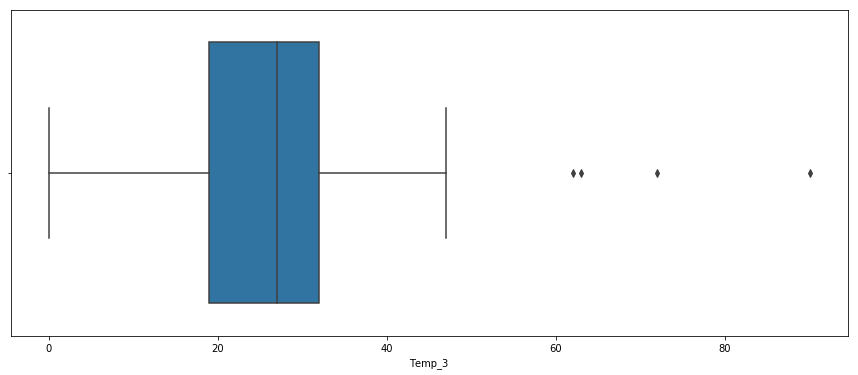

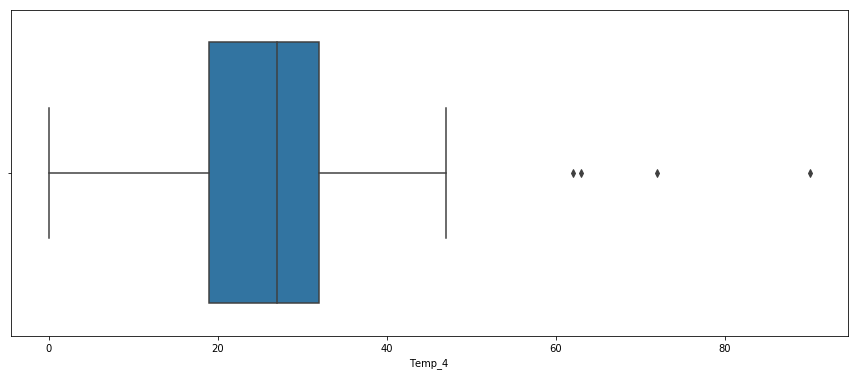

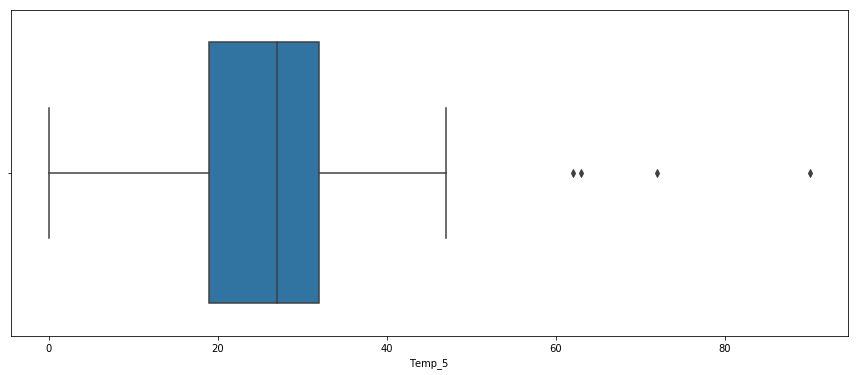

Value of RMSE with Decision Tree :  1.2626952251685875
Value of RMSE with Randon Forest Classifier :  1.0198787458914338


In [29]:
weatherAnalysis(weather_data)